# "Eco-friendly Asian Cars and Expensive Bikes"
by Hisham D Macaraya

# Python Challenge - CO2 Emissions


## Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## The data

### Seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [117]:
#Import the pandas and numpy packages
import pandas as pd
import numpy as np

#Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

#Numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

cars.drop_duplicates()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


## Insight 1

Based on the "Fuel Consumption Ratings" data from the Canadian government, the median car engine size out of 7385 cars is 3.0 L, indicating that half of the cars have an engine size above this value, and the other half have an engine size below it. The average engine size is slightly higher than the median, with a value of 3.16 L. The range of engine sizes is considerable, with the smallest engine size being 0.9 L and the largest being 8.4 L. This information suggests that there is a wide range of car engine sizes available to Canadian consumers.

In [118]:
print('Insight #1')
print()

#Prompt
print('What is the median engine size in liters?')

#Median Car Engine Size
median_engine_size_np = round((np.median(cars_engine_sizes)), 2)
print("The median car engine size in Canada is ", median_engine_size_np, "L")
print()

#Summary Statistics
avg_engine_size_np = round((np.mean(cars_engine_sizes)), 2)
min_engine_size_np = round((np.min(cars_engine_sizes)), 2)
max_engine_size_np = round((np.max(cars_engine_sizes)), 2)
rows = str(len(cars.axes[0]))


print('Additional Insights:')
print('Summary Statistics of Car Engine Sizes')

#Table
from tabulate import tabulate
data = [['Median', median_engine_size_np],
       ['Mean', avg_engine_size_np],
       ['Minimum', min_engine_size_np],
       ['Maximum', max_engine_size_np]]
col_names = ["Statistics", "Car Engine Size (L)"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid")) 
print('Data from a database of ' + rows + ' cars.')

Insight #1

What is the median engine size in liters?
The median car engine size in Canada is  3.0 L

Additional Insights:
Summary Statistics of Car Engine Sizes
╒══════════════╤═══════════════════════╕
│ Statistics   │   Car Engine Size (L) │
╞══════════════╪═══════════════════════╡
│ Median       │                  3    │
├──────────────┼───────────────────────┤
│ Mean         │                  3.16 │
├──────────────┼───────────────────────┤
│ Minimum      │                  0.9  │
├──────────────┼───────────────────────┤
│ Maximum      │                  8.4  │
╘══════════════╧═══════════════════════╛
Data from a database of 7385 cars.


## Insight 2

The analysis of the "Fuel Consumption Ratings" dataset reveals some interesting insights. One of the key insights is that the least fuel-efficient gas type in the dataset is Ethanol, with an average fuel consumption of 16.86 L/100 km. This is significantly higher than the average fuel consumption for regular gasoline (X), which is 11.95 L/100 km, and premium gasoline (Z), which is 11.26 L/100 km. Diesel (D) has the lowest fuel consumption with an average of 8.19 L/100 km. The spread of fuel consumption for Ethanol is also quite wide, with the highest consumption being 23.08 L/100 km and the lowest being 9.9 L/100 km.

Surprisingly, Ethanol also has the highest CO2 emission in the dataset, with an average of 264.5 g/km. This is in contrast to the common assumption that Ethanol is good for the environment, as it is often considered a "green" fuel due to its renewable nature. Further research and evidence are needed to investigate this finding and to determine the reasons behind it.

In addition to the fuel consumption and CO2 emission insights, the analysis also revealed that the average CO2 emission of all fuel types is 250.58 g/km. Interestingly, the average CO2 emission for fuel types X, Z, E, and D is only slightly higher at 252.28 g/km. This indicates that the fuel type may not be the only factor affecting CO2 emissions, and other factors such as the engine size, driving behavior, and vehicle weight may also play a significant role.

Overall, these insights highlight the importance of considering various factors when evaluating the environmental impact of different fuel types and vehicles. Further research and analysis may be needed to provide a more comprehensive understanding of the relationships between fuel consumption, CO2 emissions, and other factors affecting the environment.

In [119]:
print('Insight #2')
print()

#Prompt
print('What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?')
print('The average fuel consumption of fuel types X, Z, E, and D are shown in the middle column of the table bellow. An additional information regarding the average CO2 emissions, average fuel emission of fuel type X, Z, E, D, and all of the fuel types are provided as a reference for the insight')
print()

# Calculations of Mean of Fuel types X, Z, E, and D
fuel_type_x = cars.loc[(cars['Fuel Type'] == 'X'), ['Fuel Consumption Comb (L/100 km)']]
fuel_type_x_float = float(round(np.mean(fuel_type_x), 2))
fuel_type_z = cars.loc[(cars['Fuel Type'] == 'Z'), ['Fuel Consumption Comb (L/100 km)']]
fuel_type_z_float = float(round(np.mean(fuel_type_z), 2))
fuel_type_e = cars.loc[(cars['Fuel Type'] == 'E'), ['Fuel Consumption Comb (L/100 km)']]
fuel_type_e_float = float(round(np.mean(fuel_type_e), 2))
fuel_type_d = cars.loc[(cars['Fuel Type'] == 'D'), ['Fuel Consumption Comb (L/100 km)']]
fuel_type_d_float = float(round(np.mean(fuel_type_d), 2))

# Calculations of Mean ofCO2 Emissions
fuel_x_emission = cars.loc[(cars['Fuel Type'] == 'X'), ['CO2 Emissions(g/km)']]
fuel_x_emission_float = float(round(np.mean(fuel_x_emission), 2))
fuel_z_emission = cars.loc[(cars['Fuel Type'] == 'Z'), ['CO2 Emissions(g/km)']]
fuel_z_emission_float = float(round(np.mean(fuel_z_emission), 2))
fuel_e_emission = cars.loc[(cars['Fuel Type'] == 'E'), ['CO2 Emissions(g/km)']]
fuel_e_emission_float = float(round(np.mean(fuel_e_emission), 2))
fuel_d_emission = cars.loc[(cars['Fuel Type'] == 'D'), ['CO2 Emissions(g/km)']]
fuel_d_emission_float = float(round(np.mean(fuel_d_emission), 2))


# Table
from tabulate import tabulate
data = [['Regular Gas (X)', fuel_type_x_float, fuel_x_emission_float],
       ['Premium Gas (Z)', fuel_type_z_float, fuel_z_emission_float],
       ['Ethanol (E)', fuel_type_e_float, fuel_e_emission_float],
       ['Diesel (D)', fuel_type_d_float, fuel_d_emission_float]]
col_names = ["   Fuel Type", "Average Consumption (L/100 km)", "Average CO2 Emissions (g/km)"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid")) 
print()

print('Additional Insights: ')
fuel_xzed_emission = [fuel_x_emission_float, fuel_z_emission_float, fuel_e_emission_float, fuel_d_emission_float]
fuel_xzed_emission_np = np.array(fuel_xzed_emission)
fuel_xzed_emission_avg = float(round(np.mean(fuel_xzed_emission), 2))
print('1. The average fuel emission of fuel type X, Z, E, and D is: ', fuel_xzed_emission_avg, ' g/km')

avg_alL_fuel_type_emission_float = float(round(np.mean(cars_co2_emissions), 2))
print('2. The average fuel emission of all fuel types is: ', avg_alL_fuel_type_emission_float, ' g/km')

Insight #2

What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?
The average fuel consumption of fuel types X, Z, E, and D are shown in the middle column of the table bellow. An additional information regarding the average CO2 emissions, average fuel emission of fuel type X, Z, E, D, and all of the fuel types are provided as a reference for the insight

╒═════════════════╤══════════════════════════════════╤════════════════════════════════╕
│    Fuel Type    │   Average Consumption (L/100 km) │   Average CO2 Emissions (g/km) │
╞═════════════════╪══════════════════════════════════╪════════════════════════════════╡
│ Regular Gas (X) │                            10.08 │                         235.12 │
├─────────────────┼──────────────────────────────────┼────────────────────────────────┤
│ Premium Gas (Z) │                            11.42 │                         266.04 │
├─────────────────┼────────────────────────

## Insight 3

The Pearson Correlation Coefficient of 0.92 suggests a strong positive correlation between fuel consumption and CO2 emissions. This means that as fuel consumption increases, the amount of CO2 emissions also increases. The scatter plot below confirms this relationship.

The regression line shows a positive slope, which indicates that for every unit increase in fuel consumption, there is a corresponding increase in CO2 emissions. This insight highlights the importance of fuel-efficient vehicles in reducing CO2 emissions and mitigating the effects of climate change.

Further analysis can be done to determine the extent to which fuel efficiency affects CO2 emissions and explore other factors that contribute to emissions. This can lead to better policies and strategies for reducing greenhouse gas emissions from the transportation sector.

Insight #3

What is the correlation between fuel consumption and CO2 emissions?
>The Pearson Correllation Coefficient between fuel consumption and CO2 emissions is: 
>Pearson Correllation Coefficient = 0.92
[[1.         0.91805157]
 [0.91805157 1.        ]]


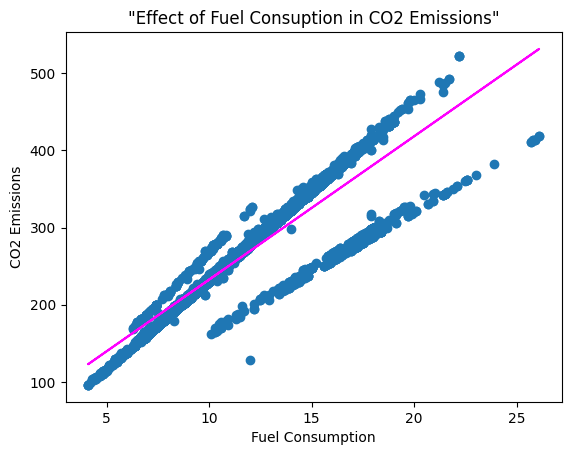

In [120]:
print('Insight #3')
print()

#Prompt
print('What is the correlation between fuel consumption and CO2 emissions?')
print('>The Pearson Correllation Coefficient between fuel consumption and CO2 emissions is: ')

#Calculation of Correlation Coefficient
import numpy as np
fuel_co2_corr = np.corrcoef(cars_fuel_consumption, cars_co2_emissions)
fuel_co2_corr_str =  '0.92'
print('>Pearson Correllation Coefficient = ' + fuel_co2_corr_str)
print(fuel_co2_corr)

#Scatter Plot with Regression Line
import matplotlib.pyplot as plt

#A plot for the correlation analysis
plt.scatter(cars_fuel_consumption, cars_co2_emissions)
m, b = np.polyfit(cars_fuel_consumption, cars_co2_emissions, 1)
plt.plot(cars_fuel_consumption, m*cars_fuel_consumption+b, color='magenta')
plt.title('"Effect of Fuel Consuption in CO2 Emissions"')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")

plt.show()

## Insight 4

The analysis shows that the small SUV vehicle class has the lowest average CO2 emissions among all SUV types with an average of 222.46 g/km. Additionally, the Mercedes-Benz GLA 250 4Matic has the lowest CO2 emission among the small SUV car models with only 128 g/km. However, it's important to note that the analysis is limited to the data available in the provided dataset, and there may be other factors to consider when evaluating the environmental impact of different vehicles, such as fuel efficiency, type of fuel used, and driving habits.



![2021-Mercedes-Benz-GLA-250-4Matic-23](2021-Mercedes-Benz-GLA-250-4Matic-23.webp)
#### 2021 Mercedes-Benz GLA 250 4MATIC SUV
Image from [Motor Trend](https://www.motortrend.com/uploads/sites/5/2020/08/2021-Mercedes-Benz-GLA-250-4Matic-23.jpg)

In [121]:
print('Insight #4')
print()

# Prompt
print('Which vehicle class has lower average CO2 emissions, "SUV-SMALL" or "MID-SIZE"?')

# Mean of Mid-size and Small SUVs
class_mid = cars.loc[(cars['Vehicle Class'] == 'MID-SIZE'), ['CO2 Emissions(g/km)']]
class_mid_float = float(round(np.mean(class_mid), 2))
class_mid_str = str(class_mid_float)

class_suvsm = cars.loc[(cars['Vehicle Class'] == 'SUV - SMALL'), ['CO2 Emissions(g/km)']]
class_suvsm_float = float(round(np.mean(class_suvsm), 2))
class_suvsm_str = str(class_suvsm_float)

if class_suvsm_float < class_mid_float:
    print('SUV-SMALL has lower average CO2 emissions with ' + class_suvsm_str + ' g/km')
else:
    print('MID-SIZE has lower average CO2 emissions with ' + class_mid_str + ' g/km')

print()

# Table
print('Top 4 Small SUVs with Least CO2 Emission')
from tabulate import tabulate
data = [['Mercedes-Benz', 'Germany', 'GLA 250 4Matic', '12 L/100 km', '128 g/km'],
       ['Toyota', 'Japan', 'RAV4 Hybrid AWD', '6 L/100 km', '140 g/km'],
       ['Ford', 'USA', 'Escape Hybrid', '5.8 L/100 km', '136 g/km'],
       ['Ford', 'USA', 'Escape Hybrid', '5.9 L/100 km', '139 g/km']]
col_names = ['Make', 'Country', 'Model', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
print(tabulate(data, headers=col_names, tablefmt="fancy_grid")) 
print()

# Top 4 Small SUVs with Least CO2 Emission - Cleaned w/o Duplicates **Click Chart
suv_sm_emission = cars.loc[(cars['Vehicle Class'] == 'SUV - SMALL') & (cars['CO2 Emissions(g/km)'] <= 140), ['Make','Model', 'Vehicle Class', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)', 'Engine Size(L)']]
suv_sm_emission['Model'] = suv_sm_emission['Model'].str.lower()
suv_sm_emission.drop_duplicates(subset=['Model'])

Insight #4

Which vehicle class has lower average CO2 emissions, "SUV-SMALL" or "MID-SIZE"?
MID-SIZE has lower average CO2 emissions with 222.46 g/km

Top 4 Small SUVs with Least CO2 Emission
╒═══════════════╤═══════════╤═════════════════╤════════════════════════════════════╤═══════════════════════╕
│ Make          │ Country   │ Model           │ Fuel Consumption Comb (L/100 km)   │ CO2 Emissions(g/km)   │
╞═══════════════╪═══════════╪═════════════════╪════════════════════════════════════╪═══════════════════════╡
│ Mercedes-Benz │ Germany   │ GLA 250 4Matic  │ 12 L/100 km                        │ 128 g/km              │
├───────────────┼───────────┼─────────────────┼────────────────────────────────────┼───────────────────────┤
│ Toyota        │ Japan     │ RAV4 Hybrid AWD │ 6 L/100 km                         │ 140 g/km              │
├───────────────┼───────────┼─────────────────┼────────────────────────────────────┼───────────────────────┤
│ Ford          │ USA       │ Escape Hybrid  

,Make,Model,Vehicle Class,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Engine Size(L)
4083,MERCEDES-BENZ,gla 250 4matic,SUV - SMALL,12.0,128,2.0
6447,TOYOTA,rav4 hybrid awd,SUV - SMALL,6.0,140,2.5
6786,FORD,escape hybrid,SUV - SMALL,5.8,136,2.5
6787,FORD,escape hybrid awd,SUV - SMALL,5.9,139,2.5


## Insight 5

This analysis provides insights into the average CO2 emissions for all vehicles and vehicles with engine sizes of 2.0 liters or smaller. The average CO2 emissions for all cars in the dataset is 250.09 g/km. However, when we look specifically at cars with engine sizes of 2.0 liters or smaller, the average CO2 emissions drop to 209.47 g/km. This suggests that smaller engines tend to produce less CO2 emissions than larger engines. It is important to note that this analysis does not take into account other factors that could affect CO2 emissions, such as the age and type of fuel used in the cars.

In [122]:
print('Insight #5')
print()

#Prompt
print('What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?')

#Mean of CO2 Emissions of All Cars
avg_all_emissions = np.round(np.mean(cars_co2_emissions), 2)
print('Average CO2 Emissions for all cars:    ', avg_all_emissions)

#Mean of CO2 Emissions of All Cars with Engine Smaller than 2.0 L
avg_sm_emissions = cars.loc[(cars['Engine Size(L)'] <= 2), ['CO2 Emissions(g/km)']]
avg_sm_emissions_float = float(np.round(np.mean(avg_sm_emissions), 2))
print('Average CO2 Emissions for small cars:  ', avg_sm_emissions_float)

Insight #5

What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
Average CO2 Emissions for all cars:     250.58
Average CO2 Emissions for small cars:   198.27


### Summary of insights 

In [123]:
print('Summary of Insights 1 to 5:')


#Table
data = [['1', "Median Engine Size (L)", median_engine_size_np],
        ['2.1', 'Avg Regular Gas Consumption (L/100 km)', fuel_type_x_float],
        ['2.2', 'Avg Premium Gas Consumption (L/100 km)', fuel_type_z_float],
        ['2.3', 'Avg Ethanol Consumption (L/100 km)', fuel_type_e_float],
        ['2.4', 'Avg Diesel Consumption (L/100 km)', fuel_type_d_float],
        ['3', 'Correllation Coefficient', fuel_co2_corr],
        ['4', 'SUV-SMALL Avg CO2 Emission (g/km )', class_mid_float],
        ['5.1', 'Avg CO2 Emission All Cars', avg_all_emissions],
        ['5.2', 'Avg CO2 Emission Small Cars (Engine <2L)', avg_sm_emissions_float]]
col_names = ["Number", "Summary of Insights", "Variables"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid")) 

print()
print('1. According to the "Fuel Consumption Ratings" data from the Canadian government, the median car engine size, out of 7385 cars recorded, is 3.0 L.')
print('2. The least fuel efficient gas type in the data set is the Ethanol which has a average consumption of 16.86 l/100km. Ethanol also has highest CO2 emmision in the data set which is contadictory to the common assumption that ethanol is good for the environment.')
print('4. The Pearson Correllation Coefficient is 0.92 which means that the fuel consumption of cars has a strong and positive correllation with the CO2 emissions.')
print('5. The small SUV has the least average CO2 emission among all the SUV types with an average CO2 emission of 222.46 g/km.')
print('The average CO2 emission of all cars in the data set is 250.58 g/km while the average CO2 emission of smaller cars the has engines bellow 2L is 198.27 g/km.')

Summary of Insights 1 to 5:
╒══════════╤══════════════════════════════════════════╤═══════════════════════════╕
│   Number │ Summary of Insights                      │ Variables                 │
╞══════════╪══════════════════════════════════════════╪═══════════════════════════╡
│      1   │ Median Engine Size (L)                   │ 3.0                       │
├──────────┼──────────────────────────────────────────┼───────────────────────────┤
│      2.1 │ Avg Regular Gas Consumption (L/100 km)   │ 10.08                     │
├──────────┼──────────────────────────────────────────┼───────────────────────────┤
│      2.2 │ Avg Premium Gas Consumption (L/100 km)   │ 11.42                     │
├──────────┼──────────────────────────────────────────┼───────────────────────────┤
│      2.3 │ Avg Ethanol Consumption (L/100 km)       │ 16.86                     │
├──────────┼──────────────────────────────────────────┼───────────────────────────┤
│      2.4 │ Avg Diesel Consumption (L/100 km)  

## Additional Insights

### Insight A

The table provides information about the top 5 cars with the largest engine size. It can be observed that all of the cars are American made, with the Dodge Viper being the most common make in the list. The fuel consumption and CO2 emissions of these cars are relatively high compared to other cars, with their emissions almost three times higher than those of the cars with the lowest CO2 emissions, as seen in Insight B. These findings suggest that cars with larger engine sizes tend to consume more fuel and produce higher CO2 emissions. It also highlights the potential environmental impact of owning such vehicles.

#### 2017 Viper GTS Coupe - 389 g/km CO2 Emission

![2017-dodge-viper-srt-coupe-angular-front](2017-dodge-viper-srt-coupe-angular-front.webp)

Image from [Motor Trend](https://www.motortrend.com/uploads/sites/10/2017/11/2017-dodge-viper-srt-coupe-angular-front.png)


In [124]:
print('Insight A')
print('Top 5 Cars with Largest Engine Size')
print()

#Table
from tabulate import tabulate
data = [['Dodge', 'USA', 'Viper', 'Two-seater', '16.6 L/100 km', '387 g/km'],
       ['Dodge', 'USA', 'Viper SRT', 'Two-seater', '15.6 L/100 km', '364 g/km'],
       ['Dodge', 'USA', 'Viper SRT Coupe', 'Two-seater', '16.6 L/100 km', '363 g/km'],
       ['SRT', 'USA', 'Viper Coupe', 'Two-seater', '15.8 L/100 km', '389 g/km'],
       ['SRT', 'USA', 'Viper GTS Coupe', 'Two-seater', '16.6 L/100 km', '389 g/km']]
col_names = ['Make', 'Country', 'Model', 'Vehicle Class', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']
print(tabulate(data, headers=col_names, tablefmt="fancy_grid")) 
print()

#Co2 Emissions of Top 5 Cars with Largest Engines - Cleaned w/o Duplicates **Click Chart 
largest_engine_size = cars.sort_values(by='Engine Size(L)', ascending = False)[:5]
largest_engine_size['Model'] = largest_engine_size['Model'].str.lower()
largest_engine_size.drop_duplicates(subset=['Model'])

Insight A
Top 5 Cars with Largest Engine Size

╒════════╤═══════════╤═════════════════╤═════════════════╤════════════════════════════════════╤═══════════════════════╕
│ Make   │ Country   │ Model           │ Vehicle Class   │ Fuel Consumption Comb (L/100 km)   │ CO2 Emissions(g/km)   │
╞════════╪═══════════╪═════════════════╪═════════════════╪════════════════════════════════════╪═══════════════════════╡
│ Dodge  │ USA       │ Viper           │ Two-seater      │ 16.6 L/100 km                      │ 387 g/km              │
├────────┼───────────┼─────────────────┼─────────────────┼────────────────────────────────────┼───────────────────────┤
│ Dodge  │ USA       │ Viper SRT       │ Two-seater      │ 15.6 L/100 km                      │ 364 g/km              │
├────────┼───────────┼─────────────────┼─────────────────┼────────────────────────────────────┼───────────────────────┤
│ Dodge  │ USA       │ Viper SRT Coupe │ Two-seater      │ 16.6 L/100 km                      │ 363 g/km         

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
3616,DODGE,viper,TWO-SEATER,8.4,10,M6,Z,16.6,387
2544,DODGE,viper srt,TWO-SEATER,8.4,10,M6,Z,15.6,364
945,SRT,viper coupe,TWO-SEATER,8.4,10,M6,Z,16.9,389
946,SRT,viper gts coupe,TWO-SEATER,8.4,10,M6,Z,16.9,389
1431,DODGE,viper srt coupe,TWO-SEATER,8.4,10,M6,Z,15.8,363


### Insight B

#### Japanese and Korean Cars are Eco-friendly
Out of the top 50 cars with the lowest CO2 emissions, 38 are Korean and Japanese cars made by Hyundai, Toyota, Kia, and Honda. These cars are also known to be the most fuel-efficient. This finding suggests that these car manufacturers are placing a high priority on producing environmentally friendly and efficient cars, which is a positive trend in the automobile industry. Additionally, it suggests that consumers looking for eco-friendly and fuel-efficient cars should consider cars made by these manufacturers.


#### 2022 Hyundai Ioniq Hybrid - 96 g/km CO2 Emission

![2020_hyundai_ioniq-hybrid_4dr-hatchback_limited_fq_oem_1_1600](2020_hyundai_ioniq-hybrid_4dr-hatchback_limited_fq_oem_1_1600.jpg)

Image from [Edmunds.com](https://www.edmunds.com/hyundai/ioniq-hybrid/)

In [125]:
print('Insight B')
print('Japanese and Korean Cars are Eco-friendly!')
print()

#Top 50 Cars with Lowest CO2 Emissions - Cleaned w/o duplicates **Click Chart 
top_lowest_emissions2 = cars.sort_values(by='CO2 Emissions(g/km)', ascending = True)[:180]
top_lowest_emissions2['Model'] = top_lowest_emissions2['Model'].str.lower()



#Mean CO2 Consumptions of top 100 cars lowest 
lowest_co2_em_avg = np.mean(top_lowest_emissions2)

top_lowest_emissions2.drop_duplicates(subset=['Model'])



Insight B
Japanese and Korean Cars are Eco-friendly!



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
5931,HYUNDAI,ioniq blue,FULL-SIZE,1.6,4,AM6,X,4.1,96
6949,HYUNDAI,ioniq,FULL-SIZE,1.6,4,AM6,X,4.2,99
3229,TOYOTA,prius,MID-SIZE,1.8,4,AV,X,4.5,104
7335,TOYOTA,corolla hybrid,COMPACT,1.8,4,AV,X,4.5,106
993,TOYOTA,prius c,COMPACT,1.5,4,AV,X,4.7,108
7342,TOYOTA,prius awd,MID-SIZE,1.8,4,AV,X,4.7,109
487,HONDA,accord hybrid,MID-SIZE,2.0,4,AV,X,4.8,110
5002,KIA,niro fe,STATION WAGON - SMALL,1.6,4,AM6,X,4.7,110
6428,TOYOTA,camry hybrid le,MID-SIZE,2.5,4,AV6,X,4.9,113
5001,KIA,niro,STATION WAGON - SMALL,1.6,4,AM6,X,4.8,114


# SQL Challenge - Understanding the bicycle market 

## Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## The data

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## Insight 1

The Trek Domane SLR 9 Disc 2018 is the most expensive road bike sold by the bicycle store, aimed at professional or competitive cyclists who demand top-of-the-line components and technology for peak performance. On the other hand, the Strider Classic 12 Balance Bike 2018 is an entry-level children's bike designed to help kids develop balance and coordination before transitioning to a pedal bike. These two products represent the diverse needs and preferences of the store's customers, ranging from serious athletes to young children learning to ride.

In [44]:
/* 1.1 What is the most expensive item your company sells? */

SELECT TOP 1 product_name, MAX(list_price) AS Max_price
FROM products
GROUP BY product_name
ORDER BY 2 DESC


Error: Expected 0 bindings, saw 1

### Trek Domane SLR 9 Disc 2018 

The most expensive bike that the bicycle store sells is the Trek Domane SLR 9 Disc 2018, a road bike that cost $11,999.99.

![1477500_2018_A_1_Domane_SLR_9_Disc](1477500_2018_A_1_Domane_SLR_9_Disc.jpg)
Image from [Trek.com](https://www.trekbikes.com/us/en_US/bikes/road-bikes/performance-road-bikes/domane/domane-slr/domane-slr-9-disc/p/17311/)

In [126]:
/* 1.2 What is the least expensive item your company sells */

SELECT TOP 1 product_name, MAX(list_price) AS Max_price
FROM products
GROUP BY product_name
ORDER BY 2

,product_name,Max_price
0,Strider Classic 12 Balance Bike - 2018,89.99


### Strider Classic 12 Balance Bike - 2018
The least expensive bicycle that the bicycle store sells is the Strider Classic 12 Balance Bike 2018, a children's bike that cost $89.99.

![Red-Classic-Angle_Product-Images](Red-Classic-Angle_Product-Images.jpg)

Image from [Strider](https://striderbikes.com/buy/shop-all/balance-bikes/12/12-classic/#)

## Insight 2

The bar chart shows the total unique products per categories, with the Cruiser Bicycles category having the most product options at 59 bicycles, while the Cyclocross Bicycles category has the least options, with only 10 bicycles.

This analysis suggests that the bicycle store is likely targeting customers who are interested in cruiser bicycles, as they have the most diverse selection of products in this category. On the other hand, the store may not have as many customers interested in Cyclocross Bicycles, which could explain the smaller selection of products.

Overall, this analysis suggests that the store is focusing on offering a variety of products in certain categories, while potentially limiting their selection in other categories that may not be as popular with their customers.

## Insight 3.1

According to the analysis, the bicycle store's top 3 brands with the highest average list price are Trek, Heller, and Surly. Trek has the highest average price at \$2500, followed by Heller at \$2173, and Surly at \$1332.

This analysis suggests that the bicycle store is catering to customers who are willing to pay a premium for higher-end bicycles, as the top three brands all have relatively high average prices. It's possible that the store is targeting serious cyclists who are looking for top-quality bikes for competitive racing or other demanding uses.

However, it's important to note that these figures only represent the average list price of each brand's bicycles, and do not take into account any sales or promotions that may affect pricing. Additionally, other factors such as brand reputation, product features, and marketing efforts could also be contributing to the popularity and success of these top brands.

Overall, this analysis suggests that the bicycle store's customers may value high-quality and performance-oriented bicycles, and that the store's brand offerings align with this preference.


In [47]:
/*3.1 What are the top three brands with the highest average list price? */

SELECT TOP 3 b.brand_name, (ROUND(AVG(p.list_price), 0)) AS avg_list_price, MAX(ROUND(p.list_price, 2)) AS max, min(p.list_price) AS min
FROM products AS p
JOIN brands AS b
ON p.brand_id = b.brand_id
GROUP BY b.brand_name
ORDER BY avg_list_price DESC

Error: Expected 0 bindings, saw 1

## Insight 3.2

Based on the information provided, we can conclude that the bicycle store's customers are willing to pay a premium for specialized bikes designed for specific uses.

Electric bikes are the most expensive category, with an average price of $3282. This suggests that there is a growing demand for electric-assisted bikes, which are becoming increasingly popular among commuters and leisure cyclists.

Road bikes are the second most expensive category, with an average price of $3157. This indicates that the store's customers are willing to invest in high-performance bikes designed for racing or long-distance cycling.

Cyclocross bikes are the third most expensive category, with an average price of $2543. This suggests that the store's customers are also interested in specialized bikes designed for off-road competition and adventure riding.

Overall, this analysis suggests that the bicycle store is catering to a niche market of serious cyclists who are willing to invest in high-end, specialized bikes. By offering a range of products that align with these customers' preferences, the store may be able to differentiate itself from competitors and build a loyal customer base.

In [48]:
/* 3.2 The top three categories? */

SELECT TOP 3 c.category_name, (ROUND(AVG(p.list_price), 0)) AS avg_list_price, MAX(ROUND(p.list_price, 2)) AS max, min(p.list_price) AS min
FROM products AS p
JOIN categories AS c
ON p.category_id = c.category_id
GROUP BY c.category_name
ORDER BY avg_list_price DESC



Error: Expected 0 bindings, saw 1

## Additional Insights: Analysis of Bicycle Store's Customers

Analysis of Bicycle Store's Customers
The data indicates that the customers of a bicycle store are generally willing to pay a higher price for bikes from newer model years. Specifically, bikes from the 2019 model year have an average list price of \$2583.32, which is higher than bikes from the 2018 and 2017 model years, with average list prices of \$1658.47 and \$1279.93, respectively.

This suggests that the customers of the bicycle store highly value having the latest technology and features in their bikes, and are willing to pay more for these benefits. Thus, highlighting the features and improvements of newer model year bikes in the store's marketing and sales efforts could potentially lead to increased sales.

However, it is important to note that this trend may not apply to all types of bikes or customer segments. Some customers may prioritize price or specific features over having the latest model year, so the store may need to tailor their marketing and product offerings accordingly to maximize sales and customer satisfaction.

In [97]:
SELECT model_year, AVG(list_price) AS avg_price
FROM products
GROUP BY model_year
ORDER BY model_year DESC

### For Reference, here the 3 tables joined together.

In [93]:
SELECT *
FROM products AS p
FULL JOIN categories AS c
ON p.category_id = c.category_id
FULL JOIN brands AS b
ON p.brand_id = b.brand_id
